In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target)
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df  = pd.read_csv(r'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv', header=1)
print(df.columns)
df.head()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---0R---

# NOT A GOOD PRACTICE TO DO:

<a href='https://pythonbasics.org/read-csv-with-pandas/'> Read this </a>


 df.columns  = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

df.drop(0, inplace=True)

df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

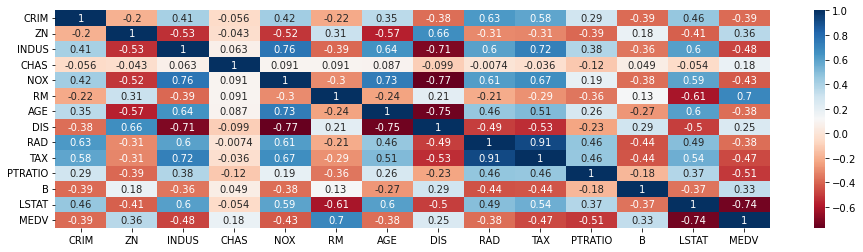

In [6]:
plt.figure(figsize=(16,4))
sns.heatmap(df.corr(), annot=True,cmap='RdBu')

In [7]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
print('----------- X train -----------')
X_train = X_scaler.fit_transform(X_train)
print(X_train)
print(X_train.shape)
print('----------- Y train -----------')
y_train = y_scaler.fit_transform(y_train).reshape(379, 13)
print(y_train.shape)
print(y_train)
print('----------- X test -----------')
X_test = X_scaler.transform(X_test)
print(X_test)
print('----------- Y test -----------')
y_test = y_scaler.transform(y_test)
print(y_test)

----------- X train -----------
[[-0.40890733  0.54641237 -0.87348092 ...  0.61072793  0.25350774
   0.22003121]
 [-0.40910291  0.0269725  -0.47940547 ... -1.4220521   0.34239169
   0.58304347]
 [-0.41208817  0.0269725  -0.47940547 ... -1.4220521   0.44734273
   0.86280855]
 ...
 [-0.25111725 -0.49246737  1.20476371 ... -1.64791655  0.36031267
  -1.29752377]
 [-0.42223735  0.0269725  -0.73828715 ...  0.24934482  0.44023614
  -0.64519348]
 [-0.37727811 -0.49246737 -0.71959014 ... -0.42824853  0.27678442
  -1.23747663]]
(379, 13)
----------- Y train -----------


ValueError: Expected 2D array, got 1D array instead:
array=[16.  18.9 27.1 23.8 19.4 23.1 50.  14.9 20.1 21.1 20.5  8.4 19.2 11.
 21.4 10.5 30.3 23.3 50.  24.  14.9 30.7 50.  14.6 43.5 13.1 20.2 20.5
 21.1 32.7 33.4 23.8 50.  26.4 22.  36.4 19.4 33.8 41.3 18.2 24.6 22.6
 44.8 23.1 19.5  8.8 29.6 22.9 13.6 46.  20.4 27.  21.9 34.9 12.7 46.7
 23.7 29.4 19.1 14.  33.4 30.1  5.  28.4  7.5 16.7 13.8 23.9 18.5 17.2
 26.6 32.  20.3 11.5 33.2 21.9 24.3 33.1 31.6 13.3 14.1 13.1 14.3 22.4
 50.  16.8 32.2 50.  18.3  8.5 17.8 19.1 23.3 23.9 22.6 26.4 22.9 39.8
 20.1 35.4 21.2 24.3 20.3 16.6 21.7 11.7 26.7 42.3 35.2 26.2 25.  21.7
 19.8 34.6 20.  31.1 18.6 19.3 18.5 12.5 22.1 18.  36.5 24.3 15.7 22.2
 15.4 13.2 13.4 13.4 20.4 24.8 20.3 13.3 50.  17.8 18.4 13.9 18.7 23.7
 25.1 10.2 10.5  6.3 19.8 37.9 25.  33.3 31.7 22.  16.2 43.8 19.8 20.1
 23.8 14.4 12.6 20.9 22.2  9.7  5.6 23.6 15.2 18.7 32.  24.8 22.3 22.9
 48.5 20.3 19.9 14.8  7.2 20.8 24.7 24.1 13.1 24.4 50.  29.8 16.6 22.
 23.1 19.6  8.3 17.7 15.6 16.5 15.6 36.2 41.7 13.8 16.2 31.5 28.5 15.
 19.9 19.9 18.5 25.3 16.4 18.9 10.9 19.4  8.8 17.3 19.   8.3 28.7 14.2
 21.8 36.1 33.  19.4 19.5 21.4 29.  22.8 23.  24.5 32.4 24.8 48.8 20.
 17.8 14.4 22.4 11.9 18.8 13.4 23.9 17.1  9.5 20.9 21.2 17.8 24.1 38.7
 15.6 20.6 14.1 48.3 23.3 17.2  7.2 28.7 16.5 18.5 18.6 50.  19.6 25.
 50.  30.1 19.7 21.4  8.4 21.  13.6 14.6 22.6 13.9 23.1 21.2 28.2 25.
 13.8 16.1 15.  24.7 24.5 21.7 50.  22.8 24.4 22.3 22.2 28.  21.  17.5
 20.   8.5 16.8 33.1 29.1 22.5 20.4 19.  10.9 14.1 23.7 29.  23.2 22.5
 21.7 10.2 17.5 50.  13.8 24.7 44.  20.6 32.9 27.5 19.5 12.8 35.4 19.4
 11.9 27.5 18.4 19.9 15.3 21.2 30.5 14.5 23.1 26.6 43.1 18.3 22.7 15.2
 22.8  7.2 13.5  8.7 26.5  7.  20.6 11.3 23.9 29.8 20.6 18.9  7.  12.
 23.5 18.1 22.9 12.7 23.3 17.2 17.9 24.2 50.  19.5 23.1 17.4 14.5 15.6
 10.4 24.8 21.9 13.1 50.  30.1 20.  23.2 22.8 24.5 20.1 17.4 11.8 21.7
 19.1 28.7 23.8 16.1 21.6 14.9 14.3 21.4 27.1  9.6 22.  21.  50.  22.
 31.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('Cross validation r-squared scores:', scores)
print('Average cross validation r-squared score:', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('Test set r-squared score', regressor.score(X_test, y_test))